In [12]:
import numpy as np

In [13]:
import holoviews as hv
import datashader as ds
from holoviews.operation.datashader import datashade, dynspread

/anaconda/lib/python3.6/site-packages/odo/backends/pandas.py:94: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access NaTType as type(pandas.NaT)
  @convert.register((pd.Timestamp, pd.Timedelta), (pd.tslib.NaTType, type(None)))


ImportError: cannot import name 'DaskInterface'


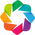

In [3]:
hv.notebook_extension('bokeh')

In [4]:
import bokeh.plotting

In [5]:
bokeh.plotting.output_notebook()

Loading BokehJS ...

# Accurately Visualize Dense Data

Lets create a sample dataset from several Gaussian distributions.

In [6]:
def gaussian_points(mu, sigma, n_points=10000):
    assert len(mu) == len(sigma)
    n_dist = len(sigma)
    
    points = np.empty((n_dist*n_points, 2))
    for i in range(n_dist):
        x = np.random.normal(loc=mu[i, 0], scale=sigma[i], size=n_points)
        y = np.random.normal(loc=mu[i, 1], scale=sigma[i], size=n_points)
        i_first = i * n_points
        i_last = (i + 1) * n_points
        points[i_first:i_last, :] = np.c_[x, y]
    
    return points

We will look at 5 Gaussian distributions, each with 10000 points, centered at (2, 2), (2, -2), (-2, -2), (-2, 2), and (0, 0), with a standard deviation of 0.01, 0.1, 0.5, 1.0, and 3.0, respectively.

In [7]:
# n_points = 10000  # initial plot w/ 10k points may crash your browser
n_points = 5000
mu = np.array([
    [2, 2], 
    [2, -2], 
    [-2, -2], 
    [-2, 2],
    [0, 0]
])
sigma = np.array([0.05, 0.1, 0.5, 1.0, 5.0])

points = gaussian_points(mu, sigma)

## Just plot every point
If we simply plot all the data points, it is difficult to see the structure of the data.

In [8]:
p = bokeh.plotting.figure()
p.circle(
    points[:, 0], points[:, 1],
     fill_alpha=0.3,
     line_alpha=0,    
)

bokeh.plotting.show(p)

 Lets go back and add an alpha value to hopefully better see the structure of the data.

This is a bit improved, but maybe only because you know we have 5 Gaussian distributions.  Also, perhaps the `alpha` value we chose will not generalize well.  The structure of the data is not immediately evident.

To resolve this, we can use [Datashader](https://github.com/bokeh/datashader) to faithfully represent the data.  Without going into too much detail, we will use [HoloViews](http://holoviews.org) to utilize Datashader together with Bokeh.

In HoloViews, you begin by specifying an "Element" object to contain your data, e.g., `Points` (scatterplots) or `Path` (trajectories), rather than starting out with a figure or plot.  

In [9]:
hv_points = hv.Points(
    points, label='Points', 
    kdims=['independent variable', 'dependent variable']
)

#free up space
del points

Even though these objects are fundamentally data containers, not visualizations, if you ask for their representation in a Jupyter notebook, a corresponding Bokeh plot will be created.

In [10]:
hv_points

:Points   [independent variable,dependent variable]

Now we have a HoloViews Element object.  This looks essentially the same as our first plot.  How do we use Datashader to represent this data?  

## Plot the points using Datashader
To render this element using Datashader, we want to use HoloViews' `datashade()` operation.

In [11]:
datashade(hv_points)

NameError: name 'datashade' is not defined

# What is happending?  
As you zoom in/out on the above image, Bokeh, Datashader, and HoloViews work together in the following process:
- Bokeh
  - set the x-range and y-range for the viewing window
- Datashader
  - render the data within that window into a screen-sized aggregate array 
  - construct an image from the aggregated data 
- HoloViews
  - embed the image into the Bokeh plot

This illustrates how Datashader processes the data into an image that can then be rendered.

<img src="assets/pipeline2.png">

# How do I customize a HoloViews image?
In general, you would use the following syntax to customize HoloViews plots (relies on `pyparsing` package):
```
%%opts [<plot options here>] (<style options here) {<norm options here>}
```
To dig into this deeper, look at the HoloViews [Customizing Plots](http://holoviews.org/user_guide/Customizing_Plots.html) documentation.  Also, you can use `hv.help()` function to learn more about HoloViews objects.

In [ ]:
hv.help(hv.Points)

# Spreading

The Datashader examples above treat points as infinitesimal in width, such that a given point or small bit of line segment appears in at most one pixel. This approach ensures that the overall distribution of the points will be mathematically well founded -- each pixel will scale in value directly by the number of points that fall into it, or by the lines that cross it.

However, many monitors are sufficiently high resolution that the resulting point or line can be difficult to see---a single pixel may not actually be visible on its own, and the color of it is likely to be very difficult to make out.  To compensate for this issue, HoloViews provides access to Datashader's image-based "spreading", which makes isolated pixels "spread" into adjacent ones for visibility.  Because the amount of spreading that's useful depends on how close the datapoints are to each other on screen, the most useful such function is `dynspread`, which spreads up to a maximum sized as long as it does not exceed a specified fraction of adjacency between pixels.  You can compare the results in the two plots below after zooming in:

In [ ]:
datashade(hv_points) + dynspread(datashade(hv_points))

# Exercise

Adjust the Gaussian distributions, then regenerate the `datashade()` plot, [as shown here](#Plot-the-points-using-Datashader).  Things to try:

1. increase the number of points
2. use more/less distributions
3. change the $\mu$ (`mu`) and $\sigma$ (`sigma`) values to adjust the overlap

Note that if you try to simply plot too many points, [using either Bokeh or HoloViews](#Just-plot-every-point), it may crash your browser (it's good to get a feel for this limit but be careful). 

In [ ]:
# # code frome above
# mu = np.array([
#     [2, 2], 
#     [2, -2], 
#     [-2, -2], 
#     [-2, 2],
#     [0, 0],
# ])
# sigma = np.array([0.01, 0.1, 0.5, 1.0, 3.0])
#
# points = gaussian_points(mu, sigma)

# [enter your code here]




Run the following cell to see one possible solution.

In [ ]:
%load solutions/03_exercise.py